In [1]:
import numpy as np
import cv2 
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Contrast processing

We have 
$$ E(u) = \int_{\Omega} \frac{1}{2}||u(x) - u_0(x)||^2 + \frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)||u(x)-u(y)||^2 dxdy.$$
To compute of gradient, we have that $\nabla E(u)$ on $u$ satisface que
$$\frac{d}{dt} E(u + t\psi)|_{t=0} = \langle \nabla E(u), \psi\rangle \;\; \forall \psi \in C_{c}^\infty(\Omega⊂\mathbb{R}^2, \mathbb{R}^3)\mbox{ (diferenciable) }.$$ 
Now
\begin{eqnarray*}
    E(u + t\psi)
    & = & \int_{\Omega} \frac{1}{2}||(u + t\psi)(x) - u_0(x)||^2 + \frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)||(u + t\psi)(x)-(u + t\psi)(y)||^2 dxdy   \\
    & = &\frac{1}{2} \int_{\Omega}  ||(u+t\psi)(x)||^2-2\langle (u+t\psi)(x), u_0(x)\rangle +||u_0(x)||^2 \\ 
    &  &+\frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)\Big(||(u+t\psi)(x)||^2-2\langle (u+t\psi)(x), (u+t\psi)(y) \rangle + ||(u+t\psi)(y)||^2\Big) dxdy\\
    & = &\frac{1}{2} \int_{\Omega}  ||u(x)||^2+2\langle u(x), t\psi(x)\rangle +t^2||\psi(x)||^2 - 2\langle (u+t\psi)(x), u_0(x)\rangle + ||u_0(x)||^2\\ 
    &  &+\frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)\Big(||(u+t\psi)(x)||^2-2\langle (u+t\psi)(x), (u+t\psi)(y)+||(u+t\psi)(y)||^2\rangle \Big)dxdy\\
    & = &\frac{1}{2} \int_{\Omega}  ||u(x)||^2+2t\langle u(x), t\psi(x)\rangle +t^2||\psi(x)||^2 - 2\langle u(x), u_0(x)\rangle - 2t\langle \psi(x), u_0(x)\rangle + ||u_0(x)||^2\\ 
     &  &+\frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)\Big(||u(x)||^2+2\langle u(x), \psi(x)\rangle+t^2||\psi(x)||^2+||u(y)||^2+2\langle \psi(y),  \psi(y)\rangle+t^2||\psi(y)||^2\\
     & &-2\langle u(x), u(y)\rangle -2t\langle u(x), \psi(y)\rangle -2t\langle \psi(x), u(y)\rangle -2t^2\langle \psi(x), \psi(y)\rangle \Big)\Big)dxdy
\end{eqnarray*}
By Fubini Theorem and the bilinearity of inner product, we have the next
\begin{eqnarray*}
    \frac{d}{dt} E(u + t\psi)|_{t=0} & = & \frac{1}{2} \int_{\Omega}  2\langle u(x), \psi(x)\rangle -2 \langle \psi(x), u_0(x)\rangle +\frac{\gamma}{4}\int_{\Omega}\int_{\Omega} w(x-y)\Big(2(\langle u(x), \psi(x)\rangle-\langle u(y), \psi(x)\rangle+\\
    & &\langle u(y), \psi(y)\rangle-\langle u(x), \psi(y)\rangle)\Big)dxdy\\
    & = & \int_{\Omega}  \langle u(x)-u_0(x), \psi(x)\rangle+\\
    & &\frac{\gamma }{2}\left( \int _\Omega \langle  \int _\Omega w(x-y) u(x), \psi(x)dy\rangle dx -  \int_\Omega \langle \int _\Omega w(x-y)u(x)dy,\psi(x)\rangle dx  + \int_\Omega  \langle \int _\Omega w(x-y)u(y)dx,\psi(y)\rangle dy  - \int_\Omega \langle \int _\Omega w(x-y)u(y)dx , \psi(y) \rangle dy \right)\\
    & = & \int_{\Omega}  \langle u(x)-u_0(x), \psi(x)\rangle+\\
    & &\frac{\gamma }{2}\left( \int _\Omega \langle u(x), \psi(x)\rangle dx -  \int_\Omega \langle w*u(x),\psi(x)\rangle dx  + \int_\Omega  \langle u(y),\psi(y)\rangle dy  - \int_\Omega \langle w*u(y) , \psi(y) \rangle dy \right)\\
   & = & \int_{\Omega}  \langle u(x)-u_0(x), \psi(x)\rangle + \int _\Omega \langle u(x)- w*u(x) , \phi(x)\rangle dx.
\end{eqnarray*}
In conclusion
$$ \nabla E(u) = u-u_0 - \gamma(u - w * u)$$
where $\ast$ stands for the component-wise convolution and $w$ is a normalized Gaussian kernel of standard deviation $σ$.
Applying the gradient descent algorithm associated to the previously functional in order to enhance simultaneously the details and the global contrast of img2.png

In [2]:
def fast_gaussian_convolution(u,sigma):

	gaussian_kernel_1d_1 = np.expand_dims(signal.gaussian(u.shape[0],sigma),axis=1)	
	gaussian_kernel_1d_2 = np.expand_dims(signal.gaussian(u.shape[1],sigma),axis=1)
	gaussian_kernel_2d = np.matmul(gaussian_kernel_1d_1,np.transpose(gaussian_kernel_1d_2))
	gaussian_kernel_2d = gaussian_kernel_2d/np.sum(gaussian_kernel_2d)

	return np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(u)*np.fft.fft2(gaussian_kernel_2d))))

In [3]:
def RGBtoOPP(img):
  to =  np.array( [ [1/np.sqrt(3),1/np.sqrt(2),1/np.sqrt(6)], 
                    [1/np.sqrt(3), -1/np.sqrt(2), 1/np.sqrt(6)],
                    [1/np.sqrt(3),0,-2/np.sqrt(6)] ] )
  orgb = np.zeros_like(img).astype(np.float32)
  invto = to.T
  i=0
  for row in invto:
    orgb[:,:,i]=row[0]*img[:,:,0]+row[1]*img[:,:,1]+row[2]*img[:,:,2]
    i+=1
  return orgb

In [4]:
def OPPtoRGB(img):
  to =  np.array( [ [1/np.sqrt(3),1/np.sqrt(2),1/np.sqrt(6)], 
                    [1/np.sqrt(3), -1/np.sqrt(2), 1/np.sqrt(6)],
                    [1/np.sqrt(3),0,-2/np.sqrt(6)] ] )
  rgb = np.zeros_like(img).astype(np.float32)
  i=0
  for row in to:
    rgb[:,:,i]=row[0]*img[:,:,0]+row[1]*img[:,:,1]+row[2]*img[:,:,2]
    i+=1
  return rgb

In [6]:
def MSE(u, v):
    sqErr  = np.square(u - v)
    mSqErr = sqErr.mean()
    
    return np.sqrt(mSqErr)

In [7]:
def decendentgrad(img,alpha,gamma,sigma,eps,K):
    u0    = img
    uprev = np.copy(u0).astype(np.float32)
    unext = np.zeros_like(uprev).astype(np.float32)
    k     = 0
    err   = np.inf
    
    while  err> eps and k < K:
        unext = uprev - alpha*( (uprev - u0) - gamma*( uprev - fast_gaussian_convolution(uprev,sigma) ) )
        err = MSE(unext, uprev)
        uprev = np.copy(unext)
        k    += 1
    print("Error: ",err,"Iteraciones:",k)
    return unext

Testing on the image.

In [9]:
img2 = cv2.imread("img2.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [10]:
orgb =  RGBtoOPP(img2)

In [16]:
k = 15000
imgrestored = []
#Details enhancement model
imgrestored.append(decendentgrad(orgb[:,:,0],alpha = 0.01,gamma = 0.5, 
                                 sigma = 5,eps = 0.001,K = k))
#Global contrast enhancement model
imgrestored.append(decendentgrad(orgb[:,:,1],alpha = 0.01,gamma = 0.75,
                                 sigma = 3000,eps = 0.001,K = k))
imgrestored.append(decendentgrad(orgb[:,:,2],alpha = 0.01,gamma = 0.75,
                                 sigma = 3000,eps = 0.001,K = k))

Error:  0.0009989182885263683 Iteraciones: 969
Error:  0.000999572660126527 Iteraciones: 1404
Error:  0.0009996215342803784 Iteraciones: 1774


In [13]:
contrasted = np.zeros_like(orgb).astype(np.float32)
contrasted[:,:,0] = imgrestored[0]
contrasted[:,:,1] = imgrestored[1]
contrasted[:,:,2] = imgrestored[2]
rgbcted = np.clip(OPPtoRGB(contrasted),0,255).astype(np.uint8)

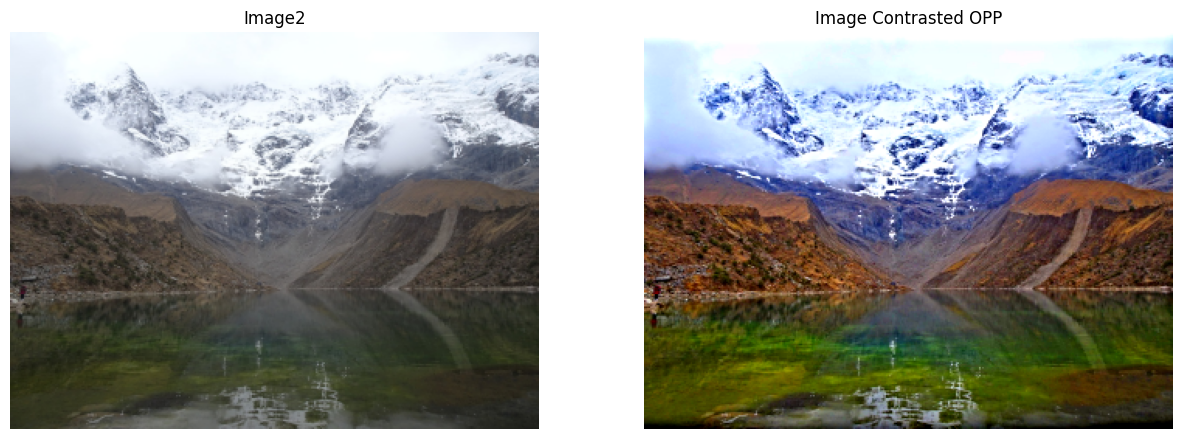

In [15]:
figure(figsize=(15,15), dpi=100)
plt.subplot(121), plt.imshow(img2), plt.title('Image2')
plt.axis('off')
plt.subplot(122), plt.imshow(rgbcted), plt.title('Image Contrasted OPP')
plt.axis('off')
plt.show()